In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
### TEST DATA

X=np.array(([-0.5, -0.5],[0.5, -0.5],[-0.5, 0.5], [0.5,0.5]), dtype=float)
y=np.array(([-0.5],[0.5],[0.5],[-0.5]), dtype=float)

In [10]:
def dtanh(x):
    """
    Derivative of the tanh function
    """
    return (1 - np.tanh(x)**2)

class NeuralNetwork:
    # TODO add batch fitting
    # TODO consider adding different activation functions
    # TODO add momentum 
    def __init__(self, X=None, y=None, nodes=3, alpha=0.001):
        """
        Constructor
        :param nodes: (int) Number of nodes in the hidden layer. Default: 3
        :param alpha: (float) Learning rate. Default: 1E-3
        """
        # TODO: impliment multiple layers
        self.nodes, self.alpha = nodes, alpha # Hyperparameters
        self.weights1, self.bias1, self.weights2, self.bias2 = None, None, None, None # Weights
        self.layer1, self.output = None, None # Layer activations
        
        # Initialize the weights
        if X is not None: 
            try:
                self.initialize(X, y)
            except: 
                print('Initialization failed')
    def initialize(self, X, y):
        """
        Initialize weights
        :param X: Input matrix
        :param y: Output vector
        """
        self.weights1   = np.random.rand(self.nodes, X.shape[1]) 
        self.bias1      = np.random.rand(self.nodes, 1) 
        self.weights2   = np.random.rand(y.shape[1], self.nodes)
        self.bias2      = np.random.rand(y.shape[1], 1) 
        
    def feedforward(self, X):
        """
        Application the activation functions to get the output
        """
        self.layer1 = np.tanh(np.dot(self.weights1, X.T) + self.bias1)
        self.output = np.tanh(np.dot(self.weights2, self.layer1) + self.bias2)
        return self.output

    def backprop(self, X, y):
        """
        Application of the chain rule to find derivative of the loss function with respect to each weight
        """
        # TODO possibly impliment non-SSE/MSE errors


        dCost = 2*(y.T -self.output)

        dCost1 = np.dot(self.weights2.T, dCost) *  dtanh(self.output)
        
        d_weights1 = np.dot(X.T, (dCost1 * dtanh(self.layer1)).T)
        d_weights2 = np.dot(self.layer1, (dCost * dtanh(self.output)).T)
   
        # Double-chek this     
        d_bias1 = np.dot(dCost.T, self.weights2).T * dtanh(self.layer1)
        d_bias2 = (dCost * dtanh(self.output))

        
        self.weights1 += self.alpha * d_weights1.T
        self.weights2 += self.alpha * d_weights2.T

        self.bias1 += self.alpha * np.sum(d_bias1, axis=1, keepdims=True)
        self.bias2 += self.alpha * np.sum(d_bias2, axis=1)
        
    def cost(self):
        """
        Returns the mean-squared-error
        """
        return np.mean((y.T - self.output)**2)
    
    def fit(self, X, y, max_iters=100):
        """
        Fit the neural network
        :param max_iters: (int) Maximum number of epochs> Default 100
        :param batch_size: (int) Batch size. Default None
        """
        
        convergence = []
        
        if self.weights1 is not None:
            self.initialize(X, y)
        
        for i in range(max_iters):
            NN.feedforward(X)
            NN.backprop(X, y)
            convergence.append(NN.cost())
            print('Iteration {}'.format(i), end='\r')
            if convergence[-1] < 1e-3:
                print()
                print("Converged in %s steps" % i)
                return convergence
            
        print()
        print("Did not reach convergence")
        return convergence


            
    def predict(self, X):
        return self.feedforward(X)
        

In [17]:
NN = NeuralNetwork(X, y, nodes=3, alpha = 0.01)
convergence = NN.fit(X, y, max_iters = 1000)


Iteration 999
Did not reach convergence


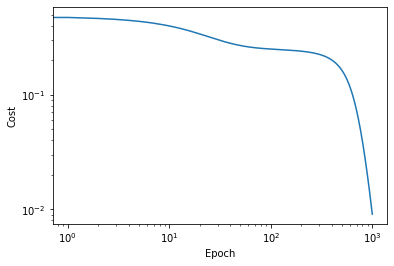

In [18]:
plt.loglog(convergence)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

The shape of this loss curve seems to suggest our learning rate is too low

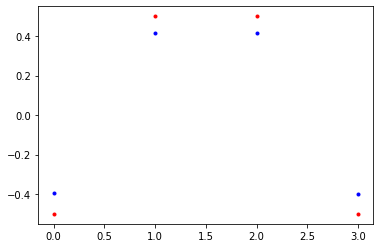

In [19]:
plt.plot(y, '.', color='red')
plt.plot(NN.predict(X).T,'.', color='blue')

We see that, unlike linear methods, our neural network can solve an XOR problem.